In [1]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
response = requests.get("https://www.imdb.com/list/ls055386972/", headers={"Accept-Language":"en-US"})
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
movies = []
for movie in soup.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find(class_="runtime").string.strip(' min'))
    year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
    movies.append({'title': title, 'duration': duration, 'year': year})
print(movies[0])

{'title': 'The Godfather', 'duration': 175, 'year': 1972}


In [4]:
movies_df = pd.DataFrame(movies)

In [5]:
movies_df.head()

,duration,title,year
0,175,The Godfather,1972
1,195,Schindler's List,1993
2,96,12 Angry Men,1957
3,116,Life Is Beautiful,1997
4,178,"The Good, the Bad and the Ugly",1966


In [6]:
movies_dict = {'title': [], 'duration': [], 'year': []}
for movie in soup.find_all("div", class_="lister-item-content"):
    movies_dict['title'].append(movie.find("h3").find("a").string)
    movies_dict['duration'].append(int(movie.find(class_="runtime").string.strip(' min')))
    movies_dict['year'].append(int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0)))
print(movies_dict['title'][0:2])

['The Godfather', "Schindler's List"]


In [7]:
movies_dict

{'title': ['The Godfather',
  "Schindler's List",
  '12 Angry Men',
  'Life Is Beautiful',
  'The Good, the Bad and the Ugly',
  'The Shawshank Redemption',
  'The Pursuit of Happyness',
  'Seven Samurai',
  'The Intouchables',
  'Central Station',
  'Requiem for a Dream',
  'A Beautiful Mind',
  "Hachi: A Dog's Tale",
  'Taken',
  'My Sassy Girl',
  'Amores Perros',
  'The Shining',
  'Apocalypto',
  'Gladiator',
  'Cast Away',
  'The Dark Knight',
  'The Pianist',
  'Titanic',
  '3-Iron',
  'Braveheart',
  "It's a Wonderful Life",
  'Spring, Summer, Fall, Winter... and Spring',
  'Alien',
  'Memories of Murder',
  'The Return',
  'I Saw the Devil',
  'Children of Heaven',
  'A Separation',
  'The Sixth Sense',
  'A Moment to Remember',
  'Departures',
  'The Road Home',
  'Saving Private Ryan',
  'The Bridge on the River Kwai',
  'Ben-Hur',
  'The Exorcist',
  'The Secret in Their Eyes',
  'Léon: The Professional',
  'The Green Mile',
  'Gran Torino',
  'Kill Bill: Vol. 1',
  'Jurass

In [8]:
movies_df2 = pd.DataFrame.from_dict(movies_dict)
movies_df2.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


In [9]:
import imdb

In [10]:
all_movies = []
for page in range(5):
    print(f"Parsing page {page + 1}...")
    soup = imdb.fetch_page(page)
    all_movies += imdb.parse_movies(soup)
print("Done")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Done


In [11]:
all_movies_df = pd.DataFrame(all_movies)

In [12]:
all_movies_df.head()

,duration,title,year
0,142,The Shawshank Redemption,1994
1,175,The Godfather,1972
2,152,The Dark Knight,2008
3,202,The Godfather: Part II,1974
4,201,The Lord of the Rings: The Return of the King,2003


In [13]:
all_movies_df.shape

(250, 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11422edd0>,
      dtype=object)

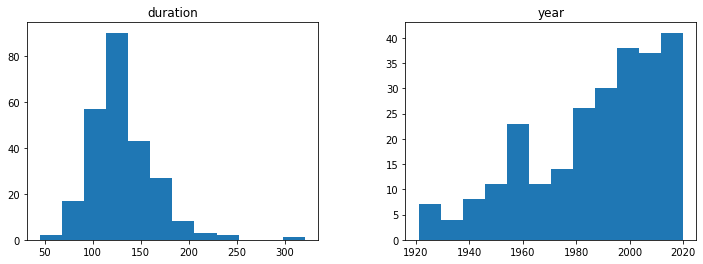

In [15]:
all_movies_df.hist(grid=False, bins=12, figsize=(12, 4))